# Project 2

In [26]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [27]:
#import dataset
original_election_data = pd.read_csv("merged_train.csv")
#original_election_data.head()

In [28]:
#import dataset
test_data = pd.read_csv("demographics_test.csv")
#test_data.head()

In [29]:
demo_data = original_election_data[original_election_data['Party'] == 1]
repub_data = original_election_data[original_election_data['Party'] != 1]

### Task 1 : Partition dataset into training and validation sets 

In [30]:
#using Holdout method
demo_x_train, demo_x_val, demo_y_train, demo_y_val = train_test_split(demo_data.iloc[:,:-3], demo_data['Democratic'], test_size = 0.25, random_state=0)
repub_x_train, repub_x_val, repub_y_train, repub_y_val = train_test_split(repub_data.iloc[:,:-3], repub_data['Republican'], test_size = 0.25, random_state=0)
#demo_x_train.head()
#repub_x_train.iloc[:,3:]

In [31]:
x_train, x_val, y_train, y_val = train_test_split(original_election_data.iloc[:,:-3], original_election_data['Party'], test_size = 0.25, random_state=0)

### Task 2 : Standardizing training and validation sets

In [211]:
scaler = StandardScaler()
scaler.fit(demo_x_train.iloc[:,3:])
demo_x_train_scaled = scaler.transform(demo_x_train.iloc[:,3:])
demo_x_train_scaled = pd.DataFrame(demo_x_train_scaled)
demo_x_val_scaled = scaler.transform(demo_x_val.iloc[:,3:])
demo_x_val_scaled = pd.DataFrame(demo_x_val_scaled)
#demo_x_train_scaled

In [212]:
scaler = StandardScaler()
scaler.fit(repub_x_train.iloc[:,3:])
repub_x_train_scaled = scaler.transform(repub_x_train.iloc[:,3:])
repub_x_train_scaled = pd.DataFrame(repub_x_train_scaled)
repub_x_val_scaled = scaler.transform(repub_x_val.iloc[:,3:])
repub_x_val_scaled = pd.DataFrame(repub_x_val_scaled)

In [213]:
scaler.fit(x_train.iloc[:,3:])
x_train_scaled = scaler.transform(x_train.iloc[:,3:])
x_train_scaled = pd.DataFrame(x_train_scaled)
x_val_scaled = scaler.transform(x_val.iloc[:,3:])
x_val_scaled = pd.DataFrame(x_val_scaled)

In [214]:
test_data_scaled = scaler.transform(test_data.iloc[:,3:])
test_data_scaled = pd.DataFrame(test_data_scaled)

### Task 3 : Build Linear Regression Model

#### For Democratic Party

In [37]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = demo_x_train_scaled, y = demo_y_train)
print(fitted_model.coef_)
print(fitted_model.intercept_)

[103624.81621321  -4266.71421325  -3820.7434915   -4479.42316769
  -5484.01243206    413.41199685 -11448.16943487  -4760.86121281
   -717.04138946   2886.76855164   5759.19791935 -24072.38083839
  -3283.54262932]
67233.13168724279


In [18]:
predicted = fitted_model.predict(demo_x_val_scaled)
print(predicted[:20])

[ 3.55345293e+04 -3.41035108e+02  2.89390534e+05  4.14102847e+04
  3.00780006e+04  3.03459723e+04  1.25468324e+05  5.04936887e+04
  8.70978445e+03  2.78846632e+04 -2.12333378e+02 -4.98143159e+03
  2.99071080e+05  7.87689350e+04  2.11997955e+05  2.47360546e+03
 -1.13971996e+04 -1.11836045e+04  1.03623570e+05  1.02778385e+05]


In [57]:
corr_coef = np.corrcoef(predicted,demo_y_val)[1,0]
print(corr_coef)
R_squared = corr_coef ** 2
print(R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(demo_y_val)-1)/(len(demo_y_val)-len(demo_x_train_scaled.columns-1))
print(adj_R_squared)

0.9559842733712435
0.9139059309331444
0.8989330493563


In [59]:
R_squared_ = fitted_model.score(X = demo_x_val_scaled, y = demo_y_val )
print(R_squared_)
adj_R_squared =1 - (1 - R_squared_)*(len(demo_y_val)-1)/(len(demo_y_val)-len(demo_x_train_scaled.columns-1))
print(adj_R_squared)

0.9062568819285339
0.8899537309595833


In [18]:
rms = m.sqrt(mean_squared_error(demo_y_val, predicted))
print(rms)
print(((demo_y_val-predicted)**2).sum())   #rss
print(np.mean((demo_y_val-predicted)**2))  #mse
print(np.sqrt(np.mean((demo_y_val-predicted)**2)))

43373.8217794965
154265650092.28104
1881288415.7595248
43373.8217794965


#### Testing diffferent attributes

In [209]:
model = linear_model.LinearRegression()
cols = [1,2,3,6,7,10,11]
fitted_model = model.fit(X = demo_x_train_scaled.iloc[:,cols], y = demo_y_train)
print(fitted_model.coef_)
print(fitted_model.intercept_)

[-16896.00337299   6301.09330134   7439.65891255 -42176.07146887
 -44474.77384941   8159.18138131 -48393.49357839]
67233.13168724277


In [215]:
predicted = fitted_model.predict(demo_x_val_scaled.iloc[:, cols])

In [216]:
corr_coef = np.corrcoef(predicted,demo_y_val)[1,0]
print(corr_coef)
R_squared = corr_coef ** 2
print(R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(demo_y_val)-1)/(len(demo_y_val)-len(demo_x_train_scaled.iloc[:, cols].columns-1))
print(adj_R_squared)

0.5450639107522295
0.2970946668045144
0.24086224014887558


In [103]:
R_squared_ = fitted_model.score(X = demo_x_val_scaled.iloc[:,cols], y = demo_y_val )
print(R_squared_)
adj_R_squared =1 - (1 - R_squared_)*(len(demo_y_val)-1)/(len(demo_y_val)-len(demo_x_train_scaled.iloc[:,cols].columns)-1)
print(adj_R_squared)

0.28959644416308383
0.2223961078001323


In [108]:
model = linear_model.ElasticNet(alpha = 1, l1_ratio = 0.5)
fitted_model = model.fit(X = demo_x_train_scaled, y = demo_y_train)
predicted = fitted_model.predict(demo_x_val_scaled)
print(fitted_model.coef_)
corr_coef = np.corrcoef(predicted, demo_y_val)[1, 0]
print(corr_coef)
R_squared = corr_coef**2
print(R_squared)

[ 60318.98120639  -1908.57695683   2771.30170185  -1539.49712625
  13044.70003014   2477.39222874  -5129.16528465  -3607.78418101
   3799.75940823   2473.05511638   -687.70635787 -10084.86381959
  -9512.70085209]
0.9421094398066846
0.8875701965728651


In [107]:
rms = m.sqrt(mean_squared_error(demo_y_val, predicted))
print(rms)
print(((demo_y_val-predicted)**2).sum())   #rss
print(np.mean((demo_y_val-predicted)**2))  #mse
print(np.sqrt(np.mean((demo_y_val-predicted)**2)))

43142.59227696904
152625228006.89664
1861283268.3767886
43142.59227696904


In [219]:
#demo_x_train_scaled.head()

In [386]:
demo_x_train.iloc[:,3:].mean()

Total Population                         274659.238683
Percent White, not Hispanic or Latino        70.684327
Percent Black, not Hispanic or Latino         9.557471
Percent Hispanic or Latino                   10.632678
Percent Foreign Born                          7.199469
Percent Female                               50.398727
Percent Age 29 and Under                     38.759771
Percent Age 65 and Older                     16.271177
Median Household Income                   53588.407407
Percent Unemployed                            6.863873
Percent Less than High School Degree         11.679167
Percent Less than Bachelor's Degree          72.279062
Percent Rural                                37.611821
dtype: float64

#### For Republic Party

In [19]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = repub_x_train_scaled, y = repub_y_train)
print(fitted_model.coef_)
print(fitted_model.intercept_)

[20959.79427444  1073.48906332    26.5507054    519.20511435
   160.1325564   -219.55535432  -795.00206857  1142.94276452
  1519.76548773   409.04285069   625.62619945  -589.5266056
  -282.89398987]
12655.983128834358


In [20]:
predicted = fitted_model.predict(repub_x_val_scaled)
print(predicted[:5])

[10845.75805198 24983.35644565 35797.76474502  2213.69567533
  1113.58400542]


In [21]:
corr_coef = np.corrcoef(predicted,repub_y_val)[1,0]
print(corr_coef)
R_squared = corr_coef ** 2
print(R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(repub_y_val)-1)/(len(repub_y_val)-len(repub_x_train_scaled.columns-1))
print(adj_R_squared)

0.9827560742690562
0.9658095015127267
0.9638081064793254


In [22]:
R_squared_ = fitted_model.score(X = repub_x_val_scaled, y = repub_y_val )
print(R_squared_)
adj_R_squared =1 - (1 - R_squared_)*(len(repub_y_val)-1)/(len(repub_y_val)-len(repub_x_train_scaled.columns-1))
print(adj_R_squared)

0.956582314849456
0.9540407918162535


In [23]:
rms = m.sqrt(mean_squared_error(repub_y_val, predicted))
print(rms)

5032.5002019522135


### Task 4 : Build Classification Model

#### k Nearest

In [115]:
classifier = KNeighborsClassifier(n_neighbors = 9)  
classifier.fit(x_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [116]:
y_pred = classifier.predict(x_val_scaled)

[[206  16]
 [ 46  31]]


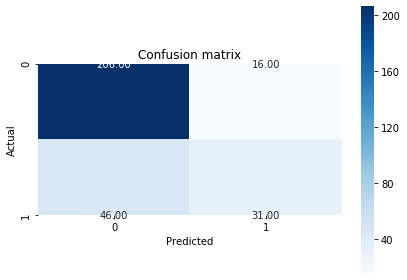

In [98]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [117]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.8127090301003345, 0.18729096989966554, array([0.82677165, 0.73333333]), array([0.94594595, 0.42857143]), array([0.88235294, 0.54098361])]


In [129]:
for i in range(1,20):
    classifier = KNeighborsClassifier(n_neighbors = i,weights='distance')  
    classifier.fit(x_train_scaled,y_train)
    y_pred = classifier.predict(x_val_scaled)
    accuracy = metrics.accuracy_score(y_val,y_pred)
    error = 1 - accuracy
    precision = metrics.precision_score(y_val, y_pred, average = None)
    recall = metrics.recall_score(y_val, y_pred, average = None)
    F1_score = metrics.f1_score(y_val, y_pred, average = None)
    print([i,accuracy, error, precision, recall, F1_score])


[1, 0.7759197324414716, 0.2240802675585284, array([0.84444444, 0.56756757]), array([0.85585586, 0.54545455]), array([0.85011186, 0.55629139])]
[2, 0.7759197324414716, 0.2240802675585284, array([0.84444444, 0.56756757]), array([0.85585586, 0.54545455]), array([0.85011186, 0.55629139])]
[3, 0.802675585284281, 0.19732441471571904, array([0.83817427, 0.65517241]), array([0.90990991, 0.49350649]), array([0.87257019, 0.56296296])]
[4, 0.7859531772575251, 0.21404682274247488, array([0.82916667, 0.61016949]), array([0.8963964 , 0.46753247]), array([0.86147186, 0.52941176])]
[5, 0.7959866220735786, 0.20401337792642138, array([0.82071713, 0.66666667]), array([0.92792793, 0.41558442]), array([0.87103594, 0.512     ])]
[6, 0.7993311036789298, 0.2006688963210702, array([0.82926829, 0.66037736]), array([0.91891892, 0.45454545]), array([0.87179487, 0.53846154])]
[7, 0.7926421404682275, 0.20735785953177255, array([0.81746032, 0.65957447]), array([0.92792793, 0.4025974 ]), array([0.86919831, 0.5       

#### Testing different attributes

In [199]:
cols = [1,2,3,6,7,10,11]

In [200]:
classifier = KNeighborsClassifier(n_neighbors = 9)  
classifier.fit(x_train_scaled.iloc[:,cols],y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [201]:
y_pred = classifier.predict(x_val_scaled.iloc[:,cols])

In [202]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.8160535117056856, 0.18394648829431437, array([0.83805668, 0.71153846]), array([0.93243243, 0.48051948]), array([0.88272921, 0.57364341])]


[[207  15]
 [ 40  37]]


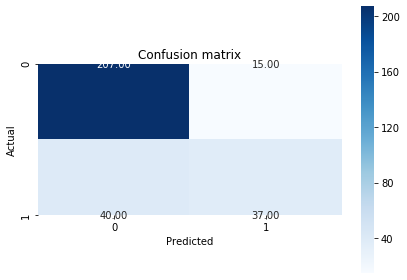

In [203]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

#### SVM

In [147]:
classifier = SVC(kernel = 'rbf', gamma = 'auto')  
classifier.fit(x_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [148]:
y_pred = classifier.predict(x_val_scaled)

[[211  11]
 [ 42  35]]


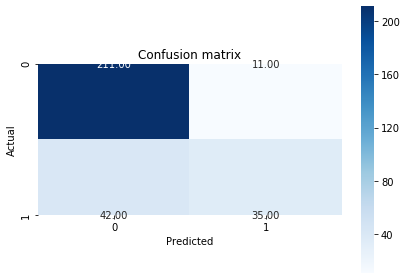

In [136]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [149]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.8561872909698997, 0.14381270903010035, array([0.85375494, 0.86956522]), array([0.97297297, 0.51948052]), array([0.90947368, 0.6504065 ])]


#### Testing different attributes

In [381]:
cols = [2,3,6,7,8,9,11,12]

In [382]:
classifier = SVC(kernel = 'rbf', gamma = 'auto')  
classifier.fit(x_train_scaled.iloc[:,cols],y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [383]:
y_pred = classifier.predict(x_val_scaled.iloc[:,cols])

In [384]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

[0.8561872909698997, 0.14381270903010035, array([0.85943775, 0.84      ]), array([0.96396396, 0.54545455]), array([0.90870488, 0.66141732])]


[[214   8]
 [ 35  42]]


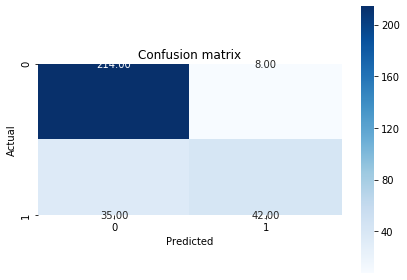

In [310]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)